#Venta de combustible Refinería

##Limpieza y Transformación

###Importar librerias

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Extraer dataframe

In [2]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Proyectos_Python/ProyectoVentaCombustibles/OilOrders.zip')
zip_ref.extractall()
zip_ref.close()

###Leer data

In [3]:
df = pd.read_csv('OilOrders.csv')
df.head()

,Order Id,Order Date,Ship Mode,Segment,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,1/3/2023,Tanker Truck,Industrial,South,Fuel,Diesel,FU-DI-001,598,748,200,2
1,2,15/8/2023,Tanker Truck,Industrial,South,Fuel,Diesel,FU-DI-001,898,1122,300,3
2,3,10/1/2023,Tanker Truck,Domestic,West,Lubricant,Hydraulic Oil,LU-HO-001,4080,5100,200,5
3,4,18/6/2022,Tanker Truck,Industrial,South,Fuel,Gasoline,FU-GA-001,1320,1650,500,2
4,5,13/7/2022,Tanker Truck,Industrial,South,Lubricant,Hydraulic Oil,LU-HO-001,4080,5100,200,5


###Revisar datos del dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Region            9994 non-null   object
 5   Category          9994 non-null   object
 6   Sub Category      9994 non-null   object
 7   Product Id        9994 non-null   object
 8   cost price        9994 non-null   int64 
 9   List Price        9994 non-null   int64 
 10  Quantity          9994 non-null   int64 
 11  Discount Percent  9994 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 937.1+ KB


###Revisar si hay datos nulos

In [5]:
df.isnull().any()

,0
Order Id,False
Order Date,False
Ship Mode,True
Segment,False
Region,False
Category,False
Sub Category,False
Product Id,False
cost price,False
List Price,False


###Cantidad de nulos

In [6]:
df.isnull().sum()

,0
Order Id,0
Order Date,0
Ship Mode,1
Segment,0
Region,0
Category,0
Sub Category,0
Product Id,0
cost price,0
List Price,0


###Borrar nulos

In [7]:
df = df.dropna()

###Revisar columna "Ship Mode"

In [8]:
df['Ship Mode'].unique()

array(['Tanker Truck', 'Not Available', 'unknown', 'Pipeline'],
      dtype=object)

In [9]:
df['Ship Mode'].value_counts().reset_index()

,Ship Mode,count
0,Tanker Truck,7907
1,Pipeline,2081
2,Not Available,4
3,unknown,1


###Borrar variables Not Available y unknown

In [10]:
var_borrar = df[df['Ship Mode'].isin(['Not Available', 'unknown'])]
df = df.drop(var_borrar.index)

df['Ship Mode'].unique()

array(['Tanker Truck', 'Pipeline'], dtype=object)

###Renombrar columnas

In [11]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'region', 'category',
       'sub_category', 'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent'],
      dtype='object')

###Derivar columnas numéricas (descuento, precio_venta y ganancia)

In [12]:
df['discount'] = df['list_price']*df['discount_percent']*0.01

df['sales_price'] = df['list_price']-df['discount']

df['profit'] = df['sales_price']-df['cost_price']

df.head()

,order_id,order_date,ship_mode,segment,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sales_price,profit
0,1,1/3/2023,Tanker Truck,Industrial,South,Fuel,Diesel,FU-DI-001,598,748,200,2,14.96,733.04,135.04
1,2,15/8/2023,Tanker Truck,Industrial,South,Fuel,Diesel,FU-DI-001,898,1122,300,3,33.66,1088.34,190.34
2,3,10/1/2023,Tanker Truck,Domestic,West,Lubricant,Hydraulic Oil,LU-HO-001,4080,5100,200,5,255.00,4845.00,765.00
3,4,18/6/2022,Tanker Truck,Industrial,South,Fuel,Gasoline,FU-GA-001,1320,1650,500,2,33.00,1617.00,297.00
4,5,13/7/2022,Tanker Truck,Industrial,South,Lubricant,Hydraulic Oil,LU-HO-001,4080,5100,200,5,255.00,4845.00,765.00


###Convertir order_date a tipo datetime

In [13]:
df['order_date'] = pd.to_datetime(df['order_date'],format='%d/%m/%Y')

###Borrar columnas

In [14]:
df.drop(columns=['list_price', 'cost_price'], inplace=True)

##Análisis de datos

### 1.Análisis exploratorio

####Tabla 1.1 Describiendo variables cualitativas

In [15]:
df.describe(include=object)

,ship_mode,segment,region,category,sub_category,product_id
count,9988,9988,9988,9988,9988,9988
unique,2,3,4,3,6,6
top,Tanker Truck,Industrial,West,Lubricant,Engine Oil,LU-EO-001
freq,7907,5187,3199,6023,3121,3121


####Tabla 1.2 Describiendo variables cuantitativas

In [16]:
df.drop(columns=['order_id', 'order_date']).describe().round(2)

,quantity,discount_percent,discount,sales_price,profit
count,9988.00,9988.00,9988.00,9988.00,9988.00
mean,378.89,3.48,298.79,8230.47,1407.06
std,222.47,1.11,297.65,7265.16,1243.31
min,100.00,2.00,4.08,193.80,30.80
25%,200.00,2.00,87.60,2499.00,448.40
50%,300.00,3.00,219.00,6027.00,1107.00
75%,500.00,4.00,408.00,12112.50,1971.00
max,1400.00,5.00,3066.00,59480.40,10424.40


#### Grafico 1.1 Cantidad de Productos vendidos en galones

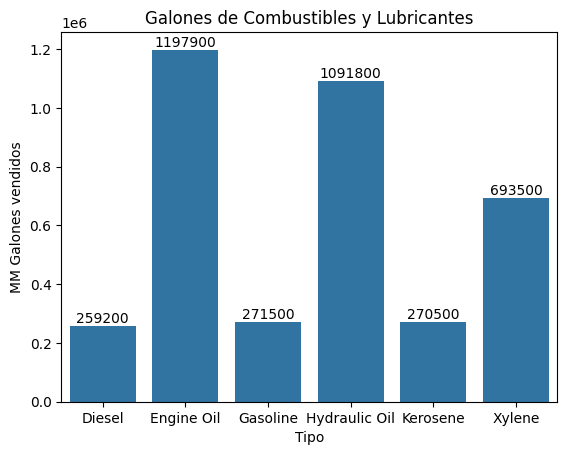

In [17]:
df_cantidad_ventas_productos = df.groupby('sub_category')['quantity'].sum().reset_index()

ax = sns.barplot(
    data=df_cantidad_ventas_productos,
    x='sub_category',
    y='quantity'
)

plt.title('Galones de Combustibles y Lubricantes')
plt.xlabel('Tipo')
plt.ylabel('MM Galones vendidos')

ax.bar_label(ax.containers[0], fmt='%.0f')

plt.show()

#### Gráfico 1.2 Ventas totales por productos

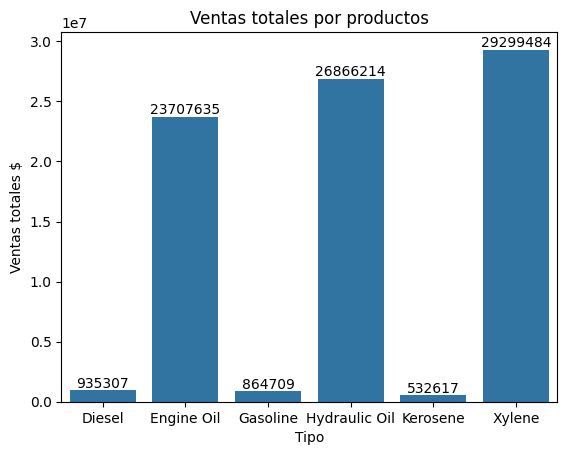

In [18]:
df_ventas_productos = df.groupby('sub_category')['sales_price'].sum().reset_index()

ax = sns.barplot(
    data=df_ventas_productos,
    x='sub_category',
    y='sales_price'
)

plt.title('Ventas totales por productos')
plt.xlabel('Tipo')
plt.ylabel('Ventas totales $')

ax.bar_label(ax.containers[0], fmt='%.0f')

plt.show()

#### Gráfico 1.3 Ventas Totales por tipo de entrega

<Figure size 1000x400 with 0 Axes>

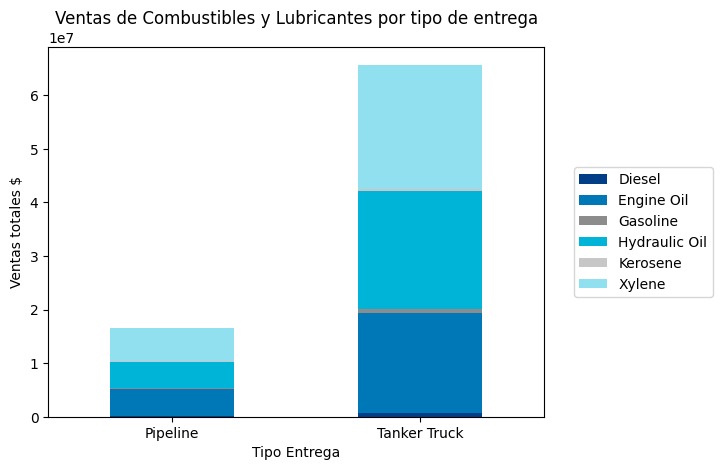

In [19]:
df_ventas_productos_tipo_entrega = df.groupby(['ship_mode','sub_category'])['sales_price'].sum().reset_index()
df_pivot = df_ventas_productos_tipo_entrega.pivot_table(
    index='ship_mode',
    columns='sub_category',
    values='sales_price')

colores = ['#003f88','#0077b6', '#8c8c8c', '#00b4d8', '#c7c7c7', '#90e0ef']

plt.figure(figsize=(10,4))
ax=df_pivot.plot(kind='bar', stacked=True, color=colores)

plt.title('Ventas de Combustibles y Lubricantes por tipo de entrega')
plt.xlabel('Tipo Entrega')
plt.ylabel('Ventas totales $')
plt.xticks(rotation=0)

plt.legend(loc='center',bbox_to_anchor=(1.2,0.5))
plt.show()

#### Gráfico 1.4 Ventas Totales por tipo de segmento

<Figure size 1000x400 with 0 Axes>

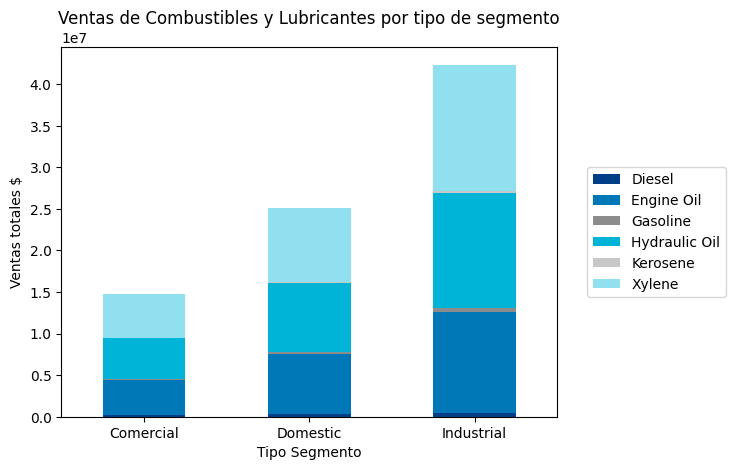

In [ ]:
df_ventas_productos_tipo_segmento = df.groupby(['segment','sub_category'])['sales_price'].sum().reset_index()

df_pivot = df_ventas_productos_tipo_segmento.pivot_table(
    index='segment',
    columns='sub_category',
    values='sales_price')

colores = ['#003f88','#0077b6', '#8c8c8c', '#00b4d8', '#c7c7c7', '#90e0ef']

plt.figure(figsize=(10,4))
ax=df_pivot.plot(kind='bar', stacked=True, color=colores)

plt.title('Ventas de Combustibles y Lubricantes por tipo de segmento')
plt.xlabel('Tipo Segmento')
plt.ylabel('Ventas totales $')
plt.xticks(rotation=0)

plt.legend(loc='center',bbox_to_anchor=(1.2,0.5))
plt.show()

#### Gráfico 1.5 Ventas de Productos por región

/tmp/ipython-input-4172575933.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_sales_region = df.groupby([pd.Grouper(key='order_date', freq='M'), 'region'])['sales_price'].sum().reset_index()
/tmp/ipython-input-4172575933.py:7: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(


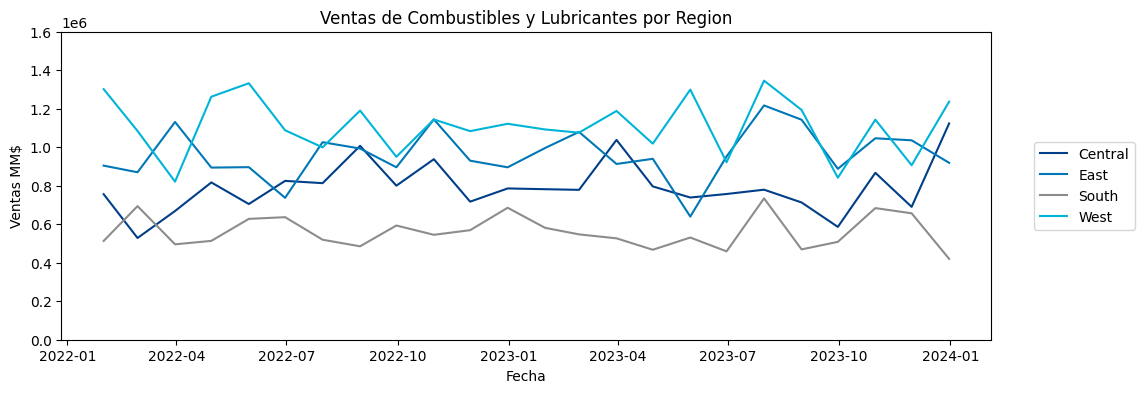

In [ ]:
df_monthly_sales_region = df.groupby([pd.Grouper(key='order_date', freq='M'), 'region'])['sales_price'].sum().reset_index()


colores = ['#003f88','#0077b6', '#8c8c8c', '#00b4d8', '#c7c7c7', '#90e0ef']

plt.figure(figsize=(12,4))
sns.lineplot(
    data=df_monthly_sales_region,
    x='order_date',
    y='sales_price',
    hue='region',
    palette=colores
)

plt.ylim(0,1.6e+06)
plt.title('Ventas de Combustibles y Lubricantes por Region')
plt.xlabel('Fecha')
plt.ylabel('Ventas MM$')

plt.legend(loc='center',bbox_to_anchor=(1.1,0.5))
plt.show()

#### Gráfico 1.6 Política de descuentos en el tiempo

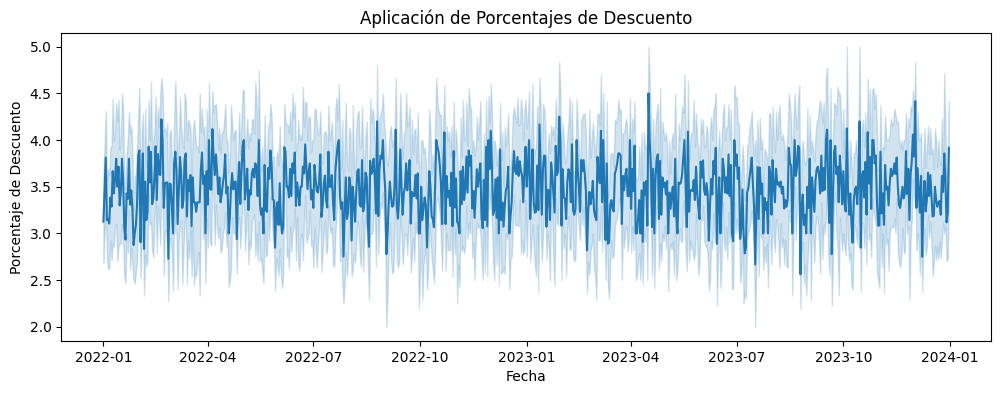

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(
    data=df,
    x='order_date',
    y='discount_percent'
)

plt.title('Aplicación de Porcentajes de Descuento')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de Descuento')

plt.show()

#### Gráfico 1.7 Relación entre variables

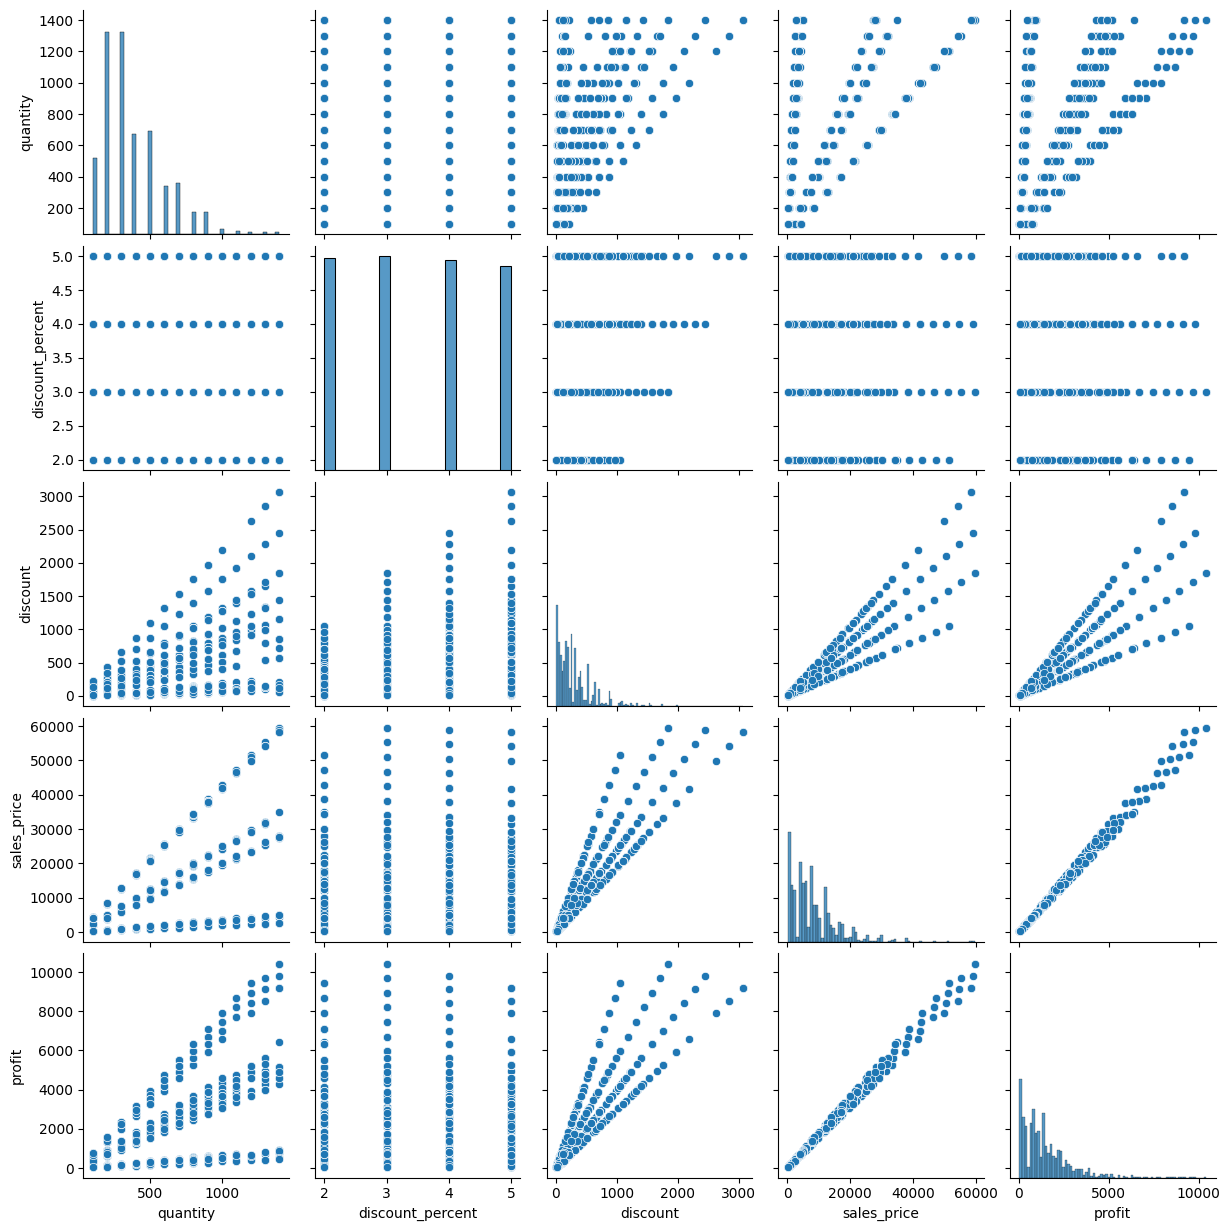

In [ ]:
sns.pairplot(
    data=(df[['quantity', 'discount_percent', 'discount', 'sales_price', 'profit']])
)

plt.show()

#### Gráfico 1.8 Correlación de Variables Numéricas

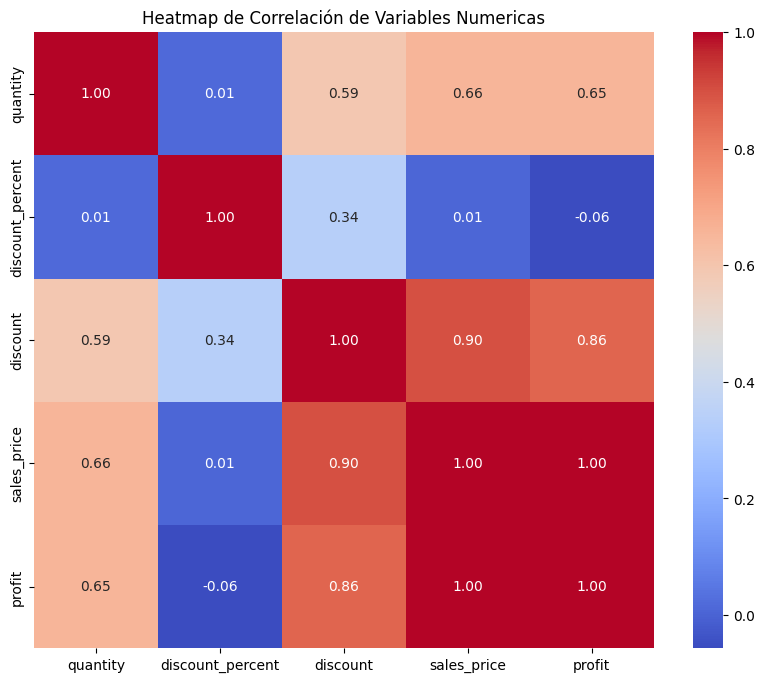

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['quantity', 'discount_percent', 'discount', 'sales_price', 'profit']].corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f")

plt.title('Heatmap de Correlación de Variables Numericas')
plt.show()

### 2.Análisis de negocio

####Data filtrada de Xylene distribuido por pipeline

In [20]:
ordenes_xylene_pipeline = df[(df['sub_category'] == 'Xylene') & (df['ship_mode'] == 'Pipeline')]

ordenes_xylene_pipeline.head()

,order_id,order_date,ship_mode,segment,region,category,sub_category,product_id,quantity,discount_percent,discount,sales_price,profit
35,36,2022-10-30,Pipeline,Domestic,Central,Petrochemical,Xylene,PE-XY-001,700,5,1533.0,29127.0,4599.0
44,45,2022-11-11,Pipeline,Domestic,Central,Petrochemical,Xylene,PE-XY-001,200,2,175.2,8584.8,1576.8
59,60,2023-06-24,Pipeline,Industrial,East,Petrochemical,Xylene,PE-XY-001,200,5,438.0,8322.0,1314.0
123,124,2023-01-21,Pipeline,Industrial,East,Petrochemical,Xylene,PE-XY-001,700,2,613.2,30046.8,5518.8
130,131,2022-07-17,Pipeline,Domestic,East,Petrochemical,Xylene,PE-XY-001,500,3,657.0,21243.0,3723.0


#### Tabla 2.1 Describiendo variables de Xylene

In [21]:
ordenes_xylene_pipeline.drop(columns=['order_id', 'order_date']).describe().round(2)

,quantity,discount_percent,discount,sales_price,profit
count,399.00,399.00,399.00,399.00,399.00
mean,361.65,3.54,570.39,15270.06,2597.70
std,211.38,1.09,403.47,8908.46,1512.39
min,100.00,2.00,87.60,4161.00,657.00
25%,200.00,3.00,262.80,8497.20,1489.20
50%,300.00,4.00,438.00,12745.80,2233.80
75%,500.00,4.00,700.80,20805.00,3285.00
max,1400.00,5.00,2847.00,58867.20,9811.20


#### Gráfico 2.1 Galones de Xylene por Orden en el período analizado

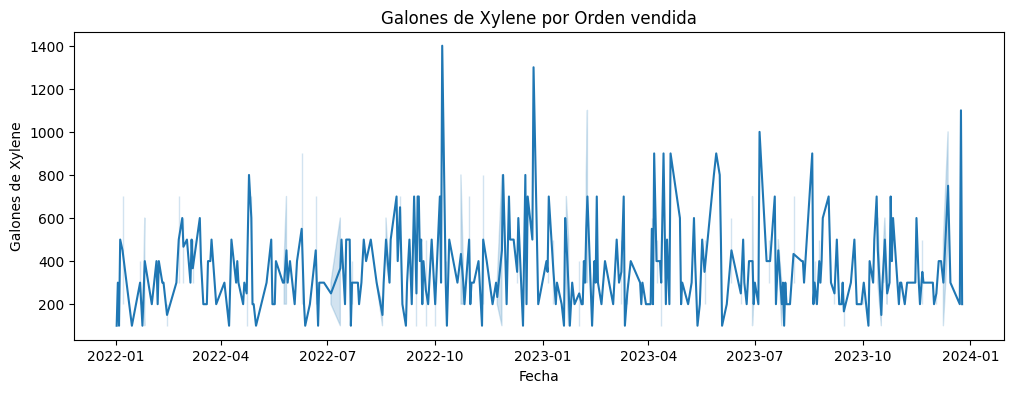

In [22]:
plt.figure(figsize=(12,4))
sns.lineplot(
    data=ordenes_xylene_pipeline,
    x='order_date',
    y='quantity'
)

plt.title('Galones de Xylene por Orden vendida')
plt.xlabel('Fecha')
plt.ylabel('Galones de Xylene')

plt.show()

#### Gráfico 2.2 Boxplot con respecto a la cantidad (galones) vendidos de Xylene

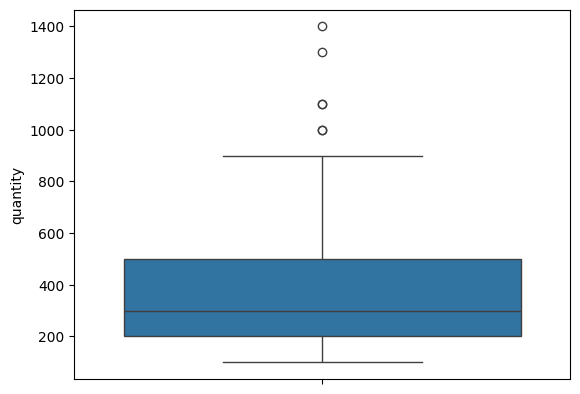

In [ ]:
sns.boxplot(
    data=ordenes_xylene_pipeline,
    y='quantity'
)
plt.show()

####Data Eliminando Outliers

In [23]:
ordenes_xylene_pipeline_sin_outliers = ordenes_xylene_pipeline[(df['quantity'] < 1000)]
ordenes_xylene_pipeline_sin_outliers.head()

/tmp/ipython-input-387970615.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ordenes_xylene_pipeline_sin_outliers = ordenes_xylene_pipeline[(df['quantity'] < 1000)]


,order_id,order_date,ship_mode,segment,region,category,sub_category,product_id,quantity,discount_percent,discount,sales_price,profit
35,36,2022-10-30,Pipeline,Domestic,Central,Petrochemical,Xylene,PE-XY-001,700,5,1533.0,29127.0,4599.0
44,45,2022-11-11,Pipeline,Domestic,Central,Petrochemical,Xylene,PE-XY-001,200,2,175.2,8584.8,1576.8
59,60,2023-06-24,Pipeline,Industrial,East,Petrochemical,Xylene,PE-XY-001,200,5,438.0,8322.0,1314.0
123,124,2023-01-21,Pipeline,Industrial,East,Petrochemical,Xylene,PE-XY-001,700,2,613.2,30046.8,5518.8
130,131,2022-07-17,Pipeline,Domestic,East,Petrochemical,Xylene,PE-XY-001,500,3,657.0,21243.0,3723.0


####Tabla 2.2 Cantidad de Ordenes, Galones, Ventas, Ganancias y Margen de Ganancia por cada Porcentaje de Descuento

In [24]:
agrupacion_descuentos_galones = ordenes_xylene_pipeline_sin_outliers.groupby('discount_percent').agg(cantidad_ordenes=('order_id', 'count'), cantidad_galones=('quantity', 'sum'), promedio_galones=('quantity', 'mean'), ventas=('sales_price', 'sum'), ganancias=('profit','sum'))

agrupacion_descuentos_galones['margen_ganancia'] = ((agrupacion_descuentos_galones['ganancias']/agrupacion_descuentos_galones['ventas'])*100).round(2)

agrupacion_descuentos_galones

,cantidad_ordenes,cantidad_galones,promedio_galones,ventas,ganancias,margen_ganancia
discount_percent,,,,,,
2,86,28000,325.581395,1201872.0,220752.0,18.37
3,107,35700,333.644860,1516750.2,265822.2,17.53
4,103,36600,355.339806,1538956.8,256492.8,16.67
5,97,37100,382.474227,1543731.0,243747.0,15.79


#### Gráfica 2.3 Porcentaje de Descuento vs Numero de Ordenes, Galones vendidos, y Ganancia.

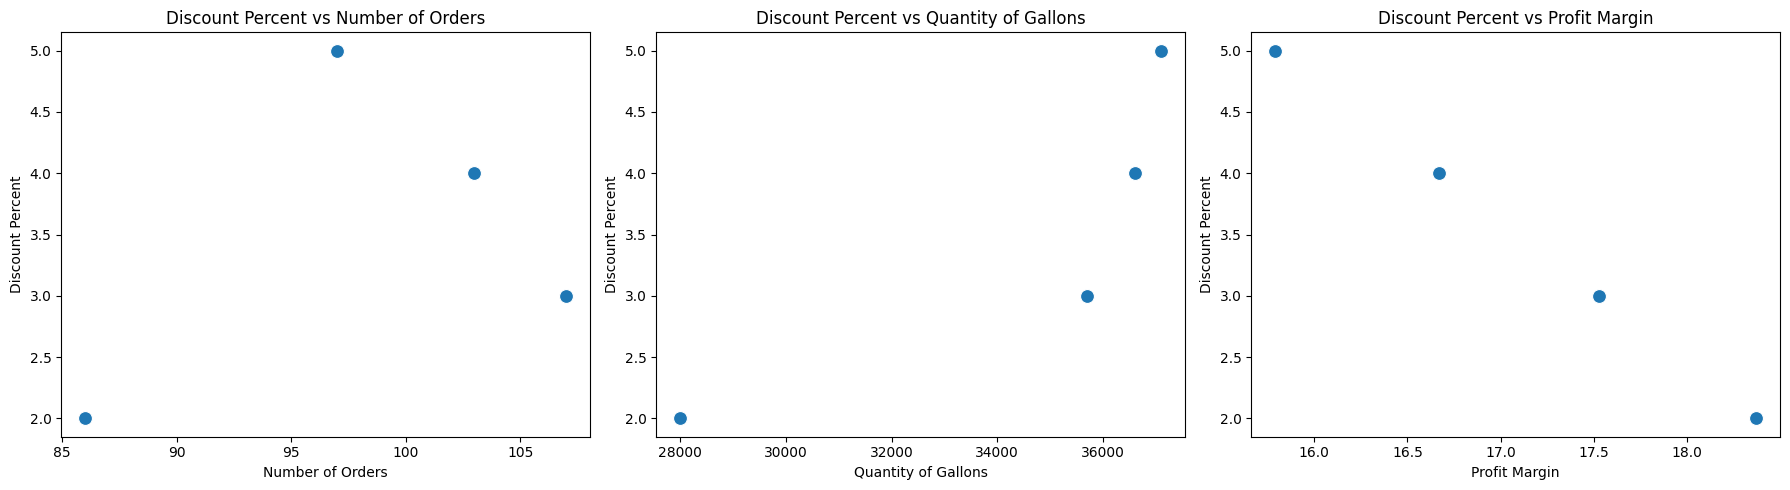

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(
    data=agrupacion_descuentos_galones,
    x='cantidad_ordenes',
    y='discount_percent',
    ax=axes[0],
    s=100
)
axes[0].set_title('Discount Percent vs Number of Orders')
axes[0].set_xlabel('Number of Orders')
axes[0].set_ylabel('Discount Percent')


sns.scatterplot(
    data=agrupacion_descuentos_galones,
    x='cantidad_galones',
    y='discount_percent',
    ax=axes[1],
    s=100
)
axes[1].set_title('Discount Percent vs Quantity of Gallons')
axes[1].set_xlabel('Quantity of Gallons')
axes[1].set_ylabel('Discount Percent')


sns.scatterplot(
    data=agrupacion_descuentos_galones,
    x='margen_ganancia',
    y='discount_percent',
    ax=axes[2],
    s=100
)
axes[2].set_title('Discount Percent vs Profit Margin')
axes[2].set_xlabel('Profit Margin')
axes[2].set_ylabel('Discount Percent')

plt.tight_layout()
plt.show()

#### Data filtrada por Porcentaje de Descuento y Región

In [26]:
agrupacion_descuentos_galones_region = ordenes_xylene_pipeline_sin_outliers.groupby(['discount_percent','region']).agg(cantidad_ordenes=('order_id', 'count'), cantidad_galones=('quantity', 'sum'), promedio_galones=('quantity', 'mean'), ventas=('sales_price', 'sum'), ganancias=('profit','sum'))

agrupacion_descuentos_galones_region['margen_ganancia'] = ((agrupacion_descuentos_galones_region['ganancias']/agrupacion_descuentos_galones_region['ventas'])*100).round(2)

agrupacion_descuentos_galones_region

cantidad_ordenes  cantidad_galones  \
discount_percent region                                        
2                Central                24              7500   
                 East                   29              8800   
                 South                   9              2100   
                 West                   24              9600   
3                Central                16              5300   
                 East                   34             10000   
                 South                  18              7100   
                 West                   39             13300   
4                Central                21              7900   
                 East                   27              8900   
                 South                  14              5700   
                 West                   41             14100   
5                Central                17              6400   
                 East                   29             11600   
                 South                  18              5900   
                 West                   33             13200   

                          promedio_galones    ventas  ganancias  \
discount_percent region                                           
2                Central        312.500000  321930.0    59130.0   
                 East           303.448276  377731.2    69379.2   
                 South          233.333333   90140.4    16556.4   
                 West           400.000000  412070.4    75686.4   
3                Central        331.250000  225175.8    39463.8   
                 East           294.117647  424860.0    74460.0   
                 South          394.444444  301650.6    52866.6   
                 West           341.025641  565063.8    99031.8   
4                Central        376.190476  332179.2    55363.2   
                 East           329.629630  374227.2    62371.2   
                 South          407.142857  239673.6    39945.6   
                 West           343.902439  592876.8    98812.8   
5                Central        376.470588  266304.0    42048.0   
                 East           400.000000  482676.0    76212.0   
                 South          327.777778  245499.0    38763.0   
                 West           400.000000  549252.0    86724.0   

                          margen_ganancia  
discount_percent region                    
2                Central            18.37  
                 East               18.37  
                 South              18.37  
                 West               18.37  
3                Central            17.53  
                 East               17.53  
                 South              17.53  
                 West               17.53  
4                Central            16.67  
                 East               16.67  
                 South              16.67  
                 West               16.67  
5                Central            15.79  
                 East               15.79  
                 South              15.79  
                 West               15.79

#### Gráfica 2.4 Galones Vendidos vs Porcentaje de Descuento por Región

/tmp/ipython-input-3381760718.py:4: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(data=agrupacion_descuentos_galones_region,


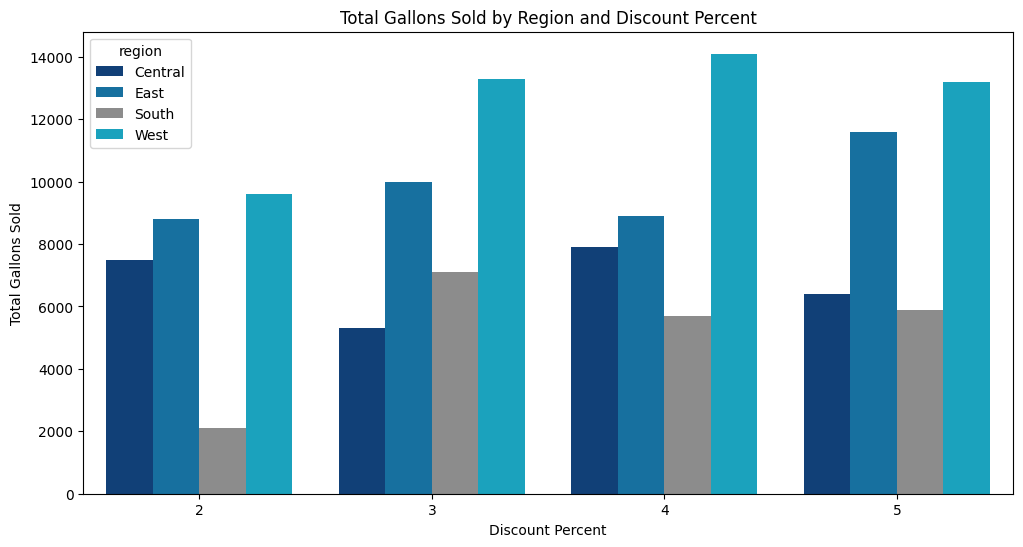

In [27]:
colores = ['#003f88','#0077b6', '#8c8c8c', '#00b4d8', '#c7c7c7', '#90e0ef']

plt.figure(figsize=(12, 6))
sns.barplot(data=agrupacion_descuentos_galones_region,
            x='discount_percent',
            y='cantidad_galones',
            hue='region',
            palette=colores)

plt.title('Total Gallons Sold by Region and Discount Percent')
plt.xlabel('Discount Percent')
plt.ylabel('Total Gallons Sold')
plt.show()

#### Data filtrada por Porcentaje de Descuento y Segmento

In [28]:
agrupacion_descuentos_galones_segment = ordenes_xylene_pipeline_sin_outliers.groupby(['discount_percent','segment']).agg(cantidad_ordenes=('order_id', 'count'), cantidad_galones=('quantity', 'sum'), promedio_galones=('quantity', 'mean'), ventas=('sales_price', 'sum'), ganancias=('profit','sum'))

agrupacion_descuentos_galones_segment['margen_ganancia'] = ((agrupacion_descuentos_galones_segment['ganancias']/agrupacion_descuentos_galones_segment['ventas'])*100).round(2)

agrupacion_descuentos_galones_segment

cantidad_ordenes  cantidad_galones  \
discount_percent segment                                          
2                Comercial                 24              8400   
                 Domestic                  15              4200   
                 Industrial                47             15400   
3                Comercial                 20              5600   
                 Domestic                  35             12700   
                 Industrial                52             17400   
4                Comercial                 20              6000   
                 Domestic                  24              9000   
                 Industrial                59             21600   
5                Comercial                 20              7800   
                 Domestic                  31             12500   
                 Industrial                46             16800   

                             promedio_galones    ventas  ganancias  \
discount_percent segment                                             
2                Comercial         350.000000  360561.6    66225.6   
                 Domestic          280.000000  180280.8    33112.8   
                 Industrial        327.659574  661029.6   121413.6   
3                Comercial         280.000000  237921.6    41697.6   
                 Domestic          362.857143  539572.2    94564.2   
                 Industrial        334.615385  739256.4   129560.4   
4                Comercial         300.000000  252288.0    42048.0   
                 Domestic          375.000000  378432.0    63072.0   
                 Industrial        366.101695  908236.8   151372.8   
5                Comercial         390.000000  324558.0    51246.0   
                 Domestic          403.225806  520125.0    82125.0   
                 Industrial        365.217391  699048.0   110376.0   

                             margen_ganancia  
discount_percent segment                      
2                Comercial             18.37  
                 Domestic              18.37  
                 Industrial            18.37  
3                Comercial             17.53  
                 Domestic              17.53  
                 Industrial            17.53  
4                Comercial             16.67  
                 Domestic              16.67  
                 Industrial            16.67  
5                Comercial             15.79  
                 Domestic              15.79  
                 Industrial            15.79

#### Gráfica 2.5 Galones Vendidos vs Porcentaje de Descuento por Segmento

/tmp/ipython-input-1143171852.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=agrupacion_descuentos_galones_segment,


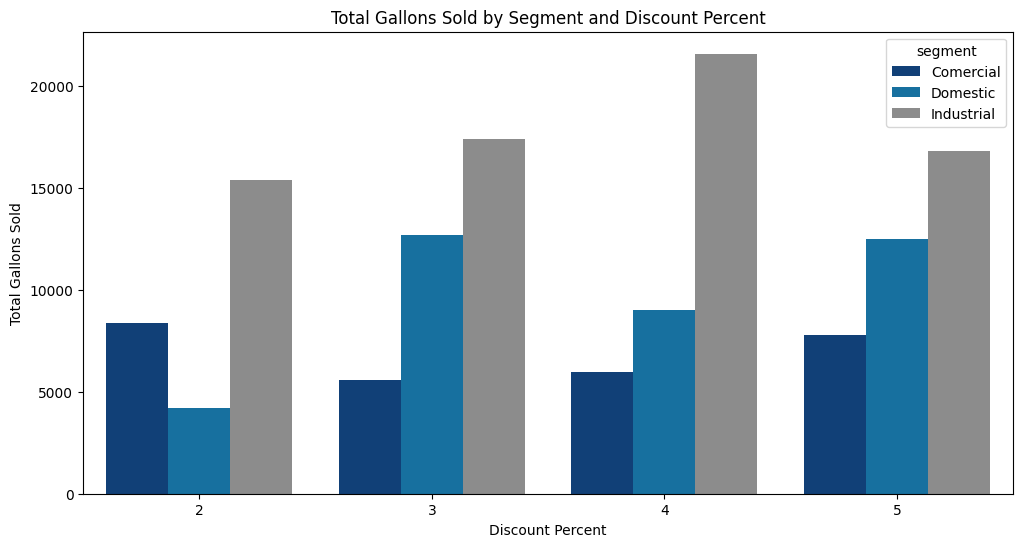

In [29]:
colores = ['#003f88','#0077b6', '#8c8c8c', '#00b4d8', '#c7c7c7', '#90e0ef']

plt.figure(figsize=(12, 6))
sns.barplot(data=agrupacion_descuentos_galones_segment,
            x='discount_percent',
            y='cantidad_galones',
            hue='segment',
            palette=colores)

plt.title('Total Gallons Sold by Segment and Discount Percent')
plt.xlabel('Discount Percent')
plt.ylabel('Total Gallons Sold')
plt.show()

#### Tabla 2.3 Cantidad de Ordenes, Galones vendidos y Porcentaje de Descuento Ponderado por Cantidad de Galones con respecto a los dos años analizados

In [30]:
ordenes_xylene_pipeline_sin_outliers['year'] = ordenes_xylene_pipeline_sin_outliers['order_date'].dt.year
ordenes_xylene_pipeline_sin_outliers['discount_percent_x_quantity'] = ordenes_xylene_pipeline_sin_outliers['discount_percent'] * ordenes_xylene_pipeline_sin_outliers['quantity']


ordenes_anuales_xylene = ordenes_xylene_pipeline_sin_outliers.groupby('year').agg(cantidad_ordenes=('order_id', 'count'), cantidad_galones=('quantity', 'sum'), descuentoXcantidad=('discount_percent_x_quantity', 'sum'))

ordenes_anuales_xylene['descuento_ponderado'] = (ordenes_anuales_xylene['descuentoXcantidad']/ordenes_anuales_xylene['cantidad_galones'])

ordenes_anuales_xylene.drop(columns='descuentoXcantidad', inplace=True)

ordenes_anuales_xylene

/tmp/ipython-input-904725704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordenes_xylene_pipeline_sin_outliers['year'] = ordenes_xylene_pipeline_sin_outliers['order_date'].dt.year
/tmp/ipython-input-904725704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordenes_xylene_pipeline_sin_outliers['discount_percent_x_quantity'] = ordenes_xylene_pipeline_sin_outliers['discount_percent'] * ordenes_xylene_pipeline_sin_outliers['quantity']


,cantidad_ordenes,cantidad_galones,descuento_ponderado
year,,,
2022,190,66700,3.548726
2023,203,70700,3.653465


####Gráfoca 2.6 Cantidad de ordenes, Cantidad de Galones y Promedio Ponderado de Descuento vs Año

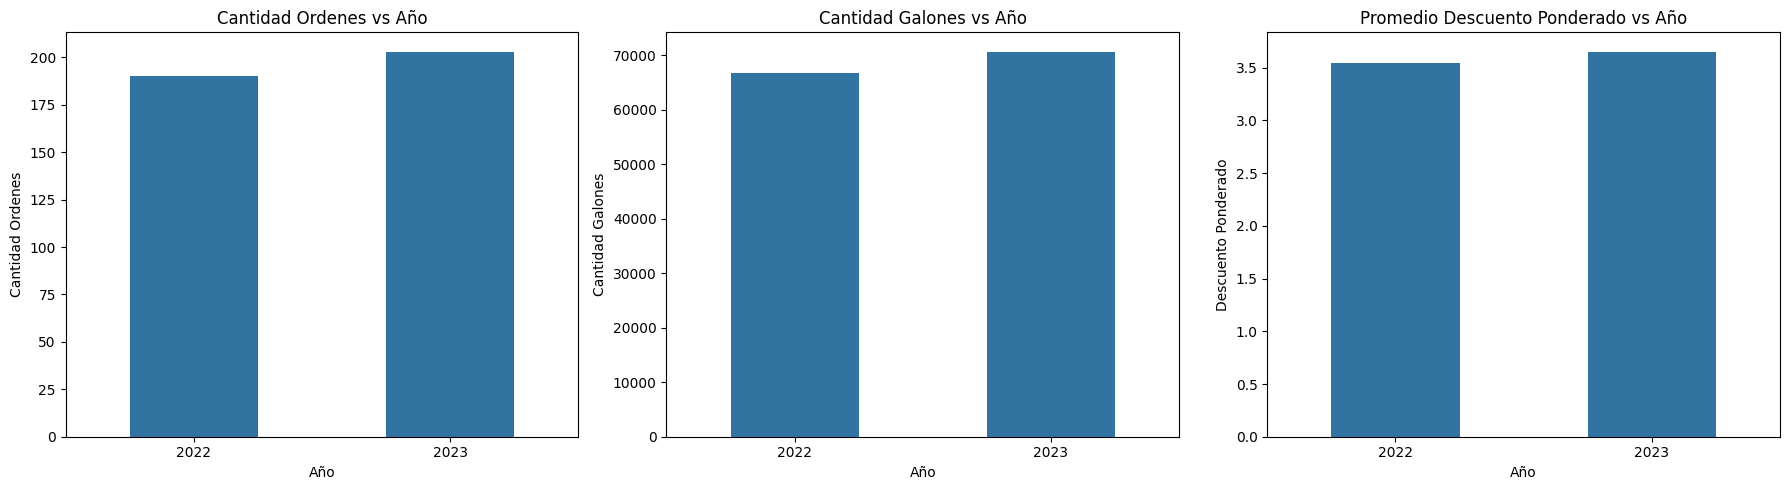

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(
    data=ordenes_anuales_xylene,
    x='year',
    y='cantidad_ordenes',
    ax=axes[0],
    width=0.5
)
axes[0].set_title('Cantidad Ordenes vs Año')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Cantidad Ordenes')


sns.barplot(
    data=ordenes_anuales_xylene,
    x='year',
    y='cantidad_galones',
    ax=axes[1],
    width=0.5
)
axes[1].set_title('Cantidad Galones vs Año')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Cantidad Galones')


sns.barplot(
    data=ordenes_anuales_xylene,
    x='year',
    y='descuento_ponderado',
    ax=axes[2],
    width=0.5
)
axes[2].set_title('Promedio Descuento Ponderado vs Año')
axes[2].set_xlabel('Año')
axes[2].set_ylabel('Descuento Ponderado')

plt.tight_layout()
plt.show()

####Tabla 2.4 Cantidad de Ordenes, Galones, Ventas, Ganancias y Margen de Ganancia por cada Porcentaje de Descuento en el año 2023

In [ ]:
ordenes_xylene_pipeline_sin_outliers['year'] = ordenes_xylene_pipeline_sin_outliers['order_date'].dt.year

ordenes_xylene_pipeline_sin_outliers_2023 = ordenes_xylene_pipeline_sin_outliers[ordenes_xylene_pipeline_sin_outliers['year'] == 2023]

agrupacion_descuentos_galones_2023 = ordenes_xylene_pipeline_sin_outliers_2023.groupby('discount_percent').agg(cantidad_ordenes=('order_id', 'count'), cantidad_galones=('quantity', 'sum'), promedio_galones=('quantity', 'mean'), ventas=('sales_price', 'sum'), ganancias=('profit','sum'))

agrupacion_descuentos_galones_2023['margen_ganancia'] = ((agrupacion_descuentos_galones_2023['ganancias']/agrupacion_descuentos_galones_2023['ventas'])*100).round(2)

agrupacion_descuentos_galones_2023

/tmp/ipython-input-1643861521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordenes_xylene_pipeline_sin_outliers['year'] = ordenes_xylene_pipeline_sin_outliers['order_date'].dt.year


,cantidad_ordenes,cantidad_galones,promedio_galones,ventas,ganancias,margen_ganancia
discount_percent,,,,,,
2,44,15200,345.454545,652444.8,119836.8,18.37
3,53,16100,303.773585,684024.6,119880.6,17.53
4,49,17400,355.102041,731635.2,121939.2,16.67
5,57,22000,385.964912,915420.0,144540.0,15.79
